In [1]:
import pandas as pd
import numpy as np

In [2]:
#Lecture de la base des données
df = pd.read_csv("df_final_dubai.csv")

# STATISTIQUES DESCRIPTIVES

In [3]:
df.head()

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,...,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,CO,NO2,SO2,O3,PM2.5,PM10,AQI,City
0,2024-01-01,25,23,23.75,71,53.25,19,11.4,0.0,10,...,1018,9.625,269.666667,16.775000,9.058333,83.083333,25.158333,68.591667,64.993683,Dubai
1,2024-01-02,24,22,23.25,67,50.25,28,16.8,0.0,10,...,1018,12.750,252.250000,14.841667,6.883333,87.250000,25.850000,64.383333,69.502499,Dubai
2,2024-01-03,24,21,22.25,63,47.25,21,12.6,0.0,9,...,1017,25.375,250.916667,17.187500,8.200000,80.541667,23.575000,64.666667,59.740902,Dubai
3,2024-01-04,24,22,23.25,67,50.25,37,22.2,0.0,10,...,1017,32.875,200.083333,9.270833,4.316667,86.916667,19.691667,46.479167,65.627639,Dubai
4,2024-01-05,23,21,21.75,60,45.00,18,10.8,0.0,10,...,1017,5.750,309.083333,25.420833,12.220833,77.916667,26.054167,51.237500,52.790759,Dubai


In [4]:
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,SR_EST_W_m2,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,30.956284,26.103825,28.172814,60.598361,45.44877,21.696721,13.018033,0.144536,11.879781,1781.967213,1009.718579,8.191257,440.464026,39.488297,20.308971,93.878415,41.574146,111.040619,85.113722
std,5.864521,4.864198,5.206393,9.944773,7.45858,5.795448,3.477269,1.602536,1.659106,248.865831,7.989379,12.765182,124.290300,16.864561,7.917554,36.922825,14.593006,65.267470,25.554694
min,20.000000,17.000000,18.750000,36.000000,27.00000,9.000000,5.400000,0.000000,2.000000,300.000000,993.000000,0.000000,200.083333,8.775000,4.316667,15.916667,12.087500,18.508333,40.561111
25%,25.000000,21.000000,23.000000,54.000000,40.50000,18.000000,10.800000,0.000000,11.000000,1650.000000,1003.000000,0.156250,346.354167,27.672917,15.086458,66.677083,30.313542,63.401042,67.222812
50%,31.000000,26.000000,28.625000,60.000000,45.00000,21.000000,12.600000,0.000000,12.000000,1800.000000,1011.000000,3.250000,434.416667,38.150000,20.333333,86.666667,40.427083,91.708333,78.422812
75%,36.000000,31.000000,33.250000,67.000000,50.25000,25.000000,15.000000,0.000000,13.000000,1950.000000,1016.750000,9.906250,519.927083,48.171875,25.414583,116.479167,51.193750,143.017708,98.414063
max,42.000000,34.000000,36.750000,92.000000,69.00000,41.000000,24.600000,29.500000,14.000000,2100.000000,1024.000000,92.375000,1012.750000,113.358333,53.775000,210.583333,98.437500,374.762500,191.291810


In [5]:
df.isnull().sum()


Date                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
TEMP_MOY                  0
HUMIDITY_MAX_PERCENT      0
HUMIDITY_EST_AVG          0
WINDSPEED_MAX_KMH         0
WINDSPEED_AVG_KMH         0
PRECIP_TOTAL_DAY_MM       0
SUNHOUR                   0
SR_EST_W_m2               0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
CO                        0
NO2                       0
SO2                       0
O3                        0
PM2.5                     0
PM10                      0
AQI                       0
City                      0
dtype: int64

## Outliers

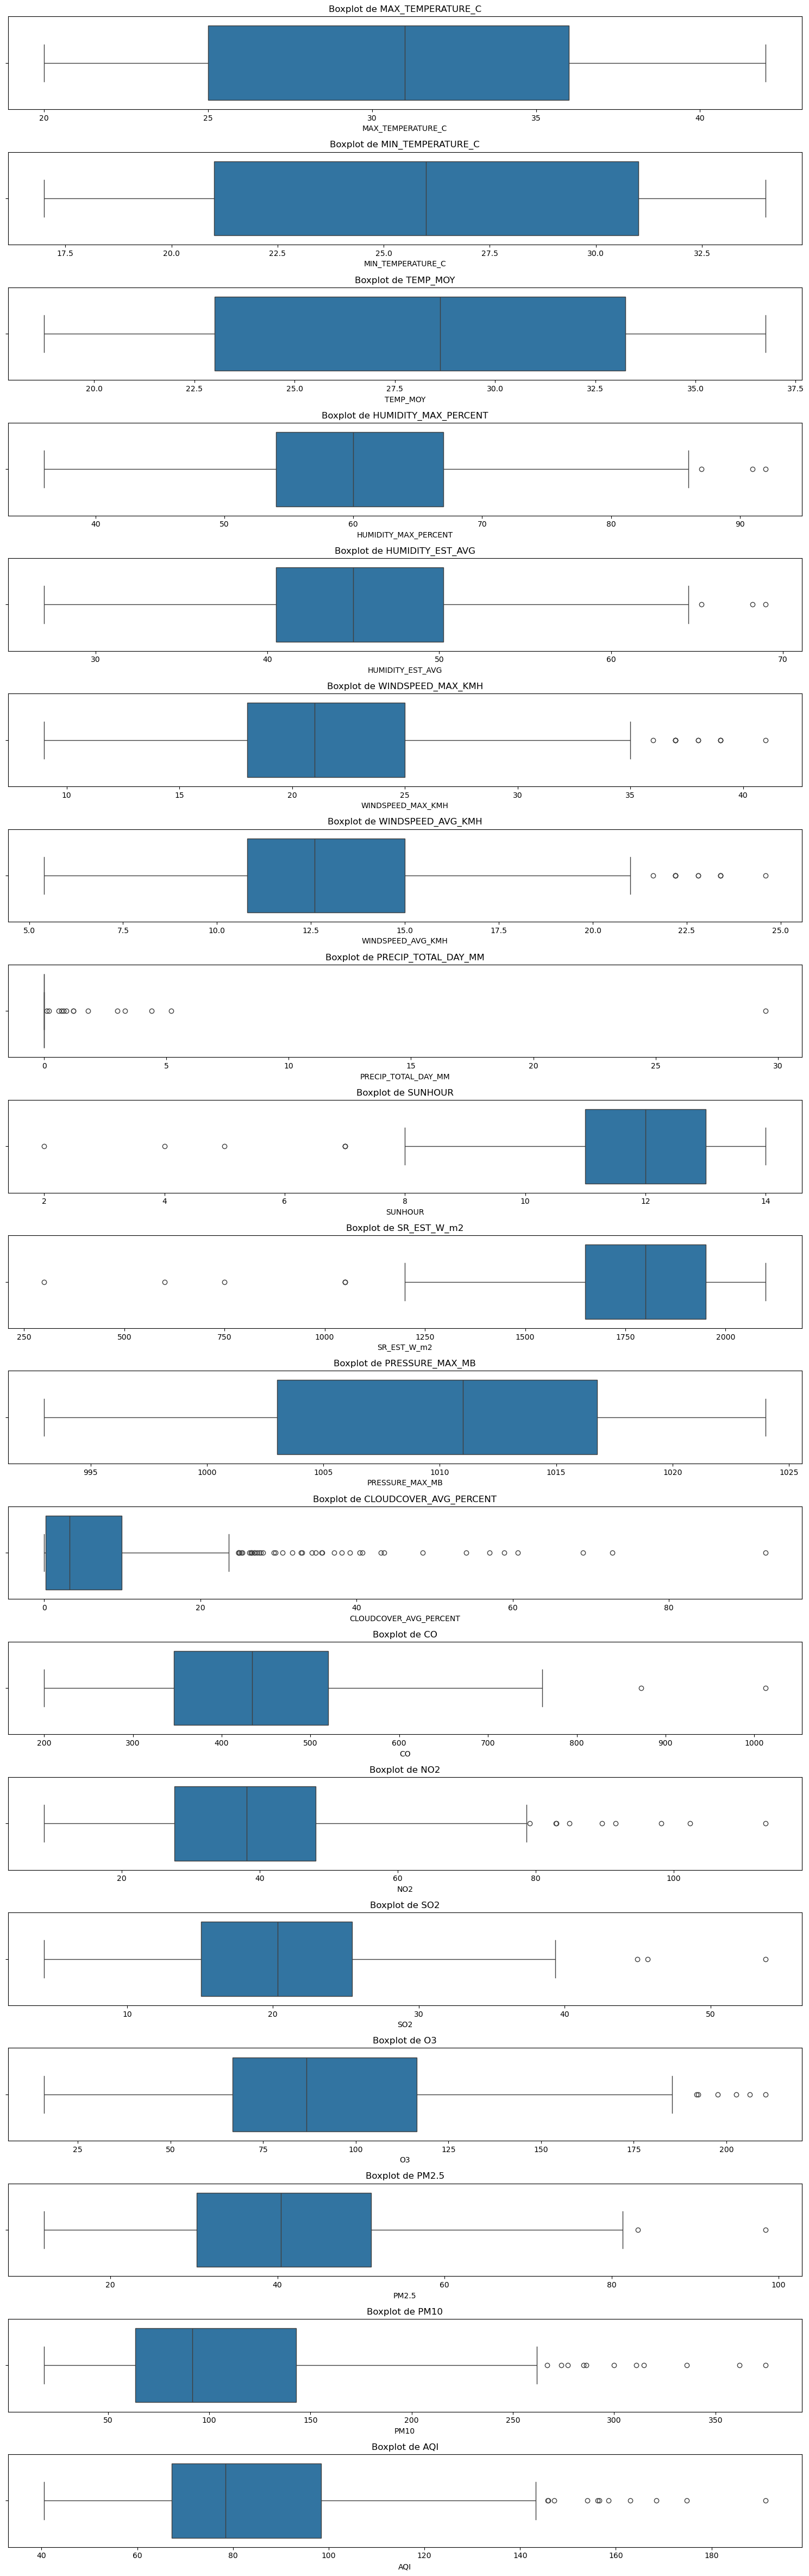

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

# Définir la taille de la figure pour les boxplots
plt.figure(figsize=(15, len(numeric_cols) * 2.5))

# Générer les boxplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

#### Traitement des valeurs extrêmes (outliers)
Dans cette étude, les valeurs extrêmes présentes dans les données n’ont pas été supprimées ni imputées. Cette décision repose sur le fait que, dans le contexte de la qualité de l’air, les outliers peuvent représenter des événements environnementaux réels et significatifs tels que des pics de pollution liés à des conditions météorologiques particulières, des épisodes de trafic intense ou d'autres incidents ponctuels. Les exclure reviendrait à ignorer des signaux critiques dans l’analyse. Afin de préserver l’intégrité des données et de refléter fidèlement leur variabilité naturelle, nous avons opté pour l’utilisation de modèles robustes (notamment la régression avec norme de Huber) qui permettent de limiter l’impact des valeurs extrêmes sans pour autant les écarter. Ce choix vise à assurer à la fois la validité scientifique de l’analyse et la pertinence opérationnelle des résultats, notamment pour la détection et l’interprétation des épisodes de pollution atypiques.


## Distribution des variables

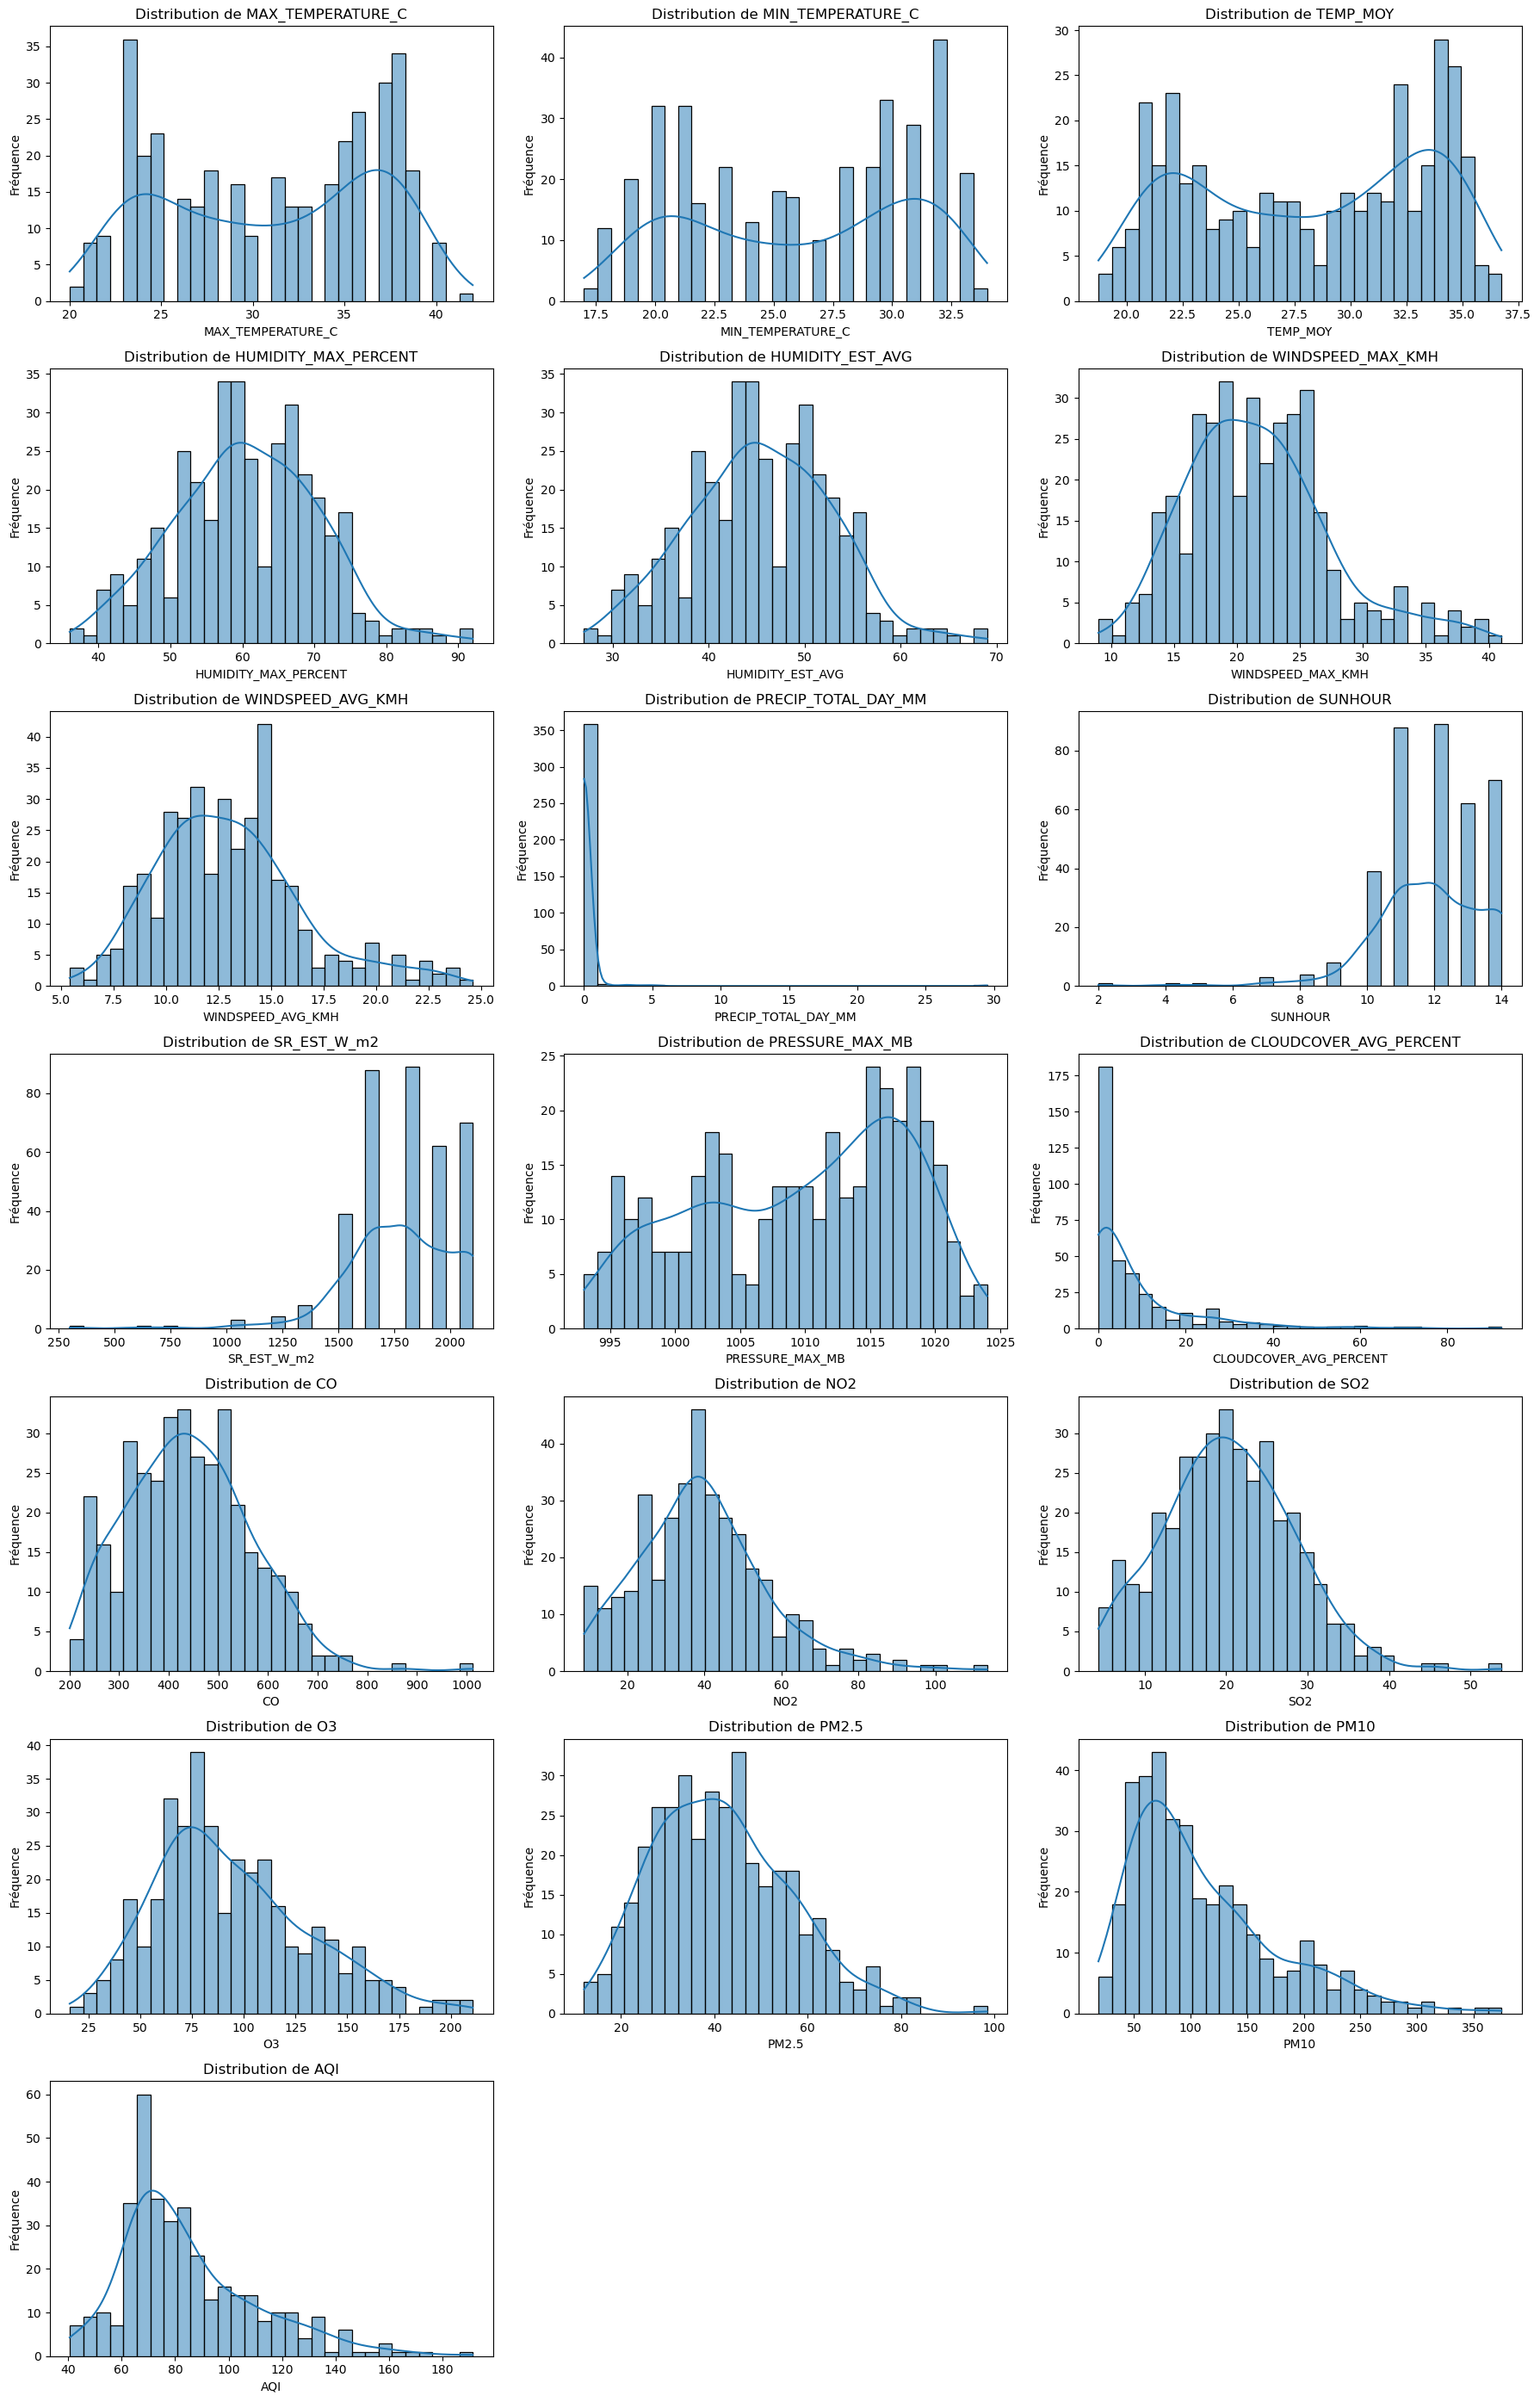

In [7]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Définir la taille de la figure
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Créer un histogramme avec courbe de densité pour chaque variable
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

# Supprimer les axes vides si le nombre de variables < nombre de sous-graphiques
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Corrélation entre les variables

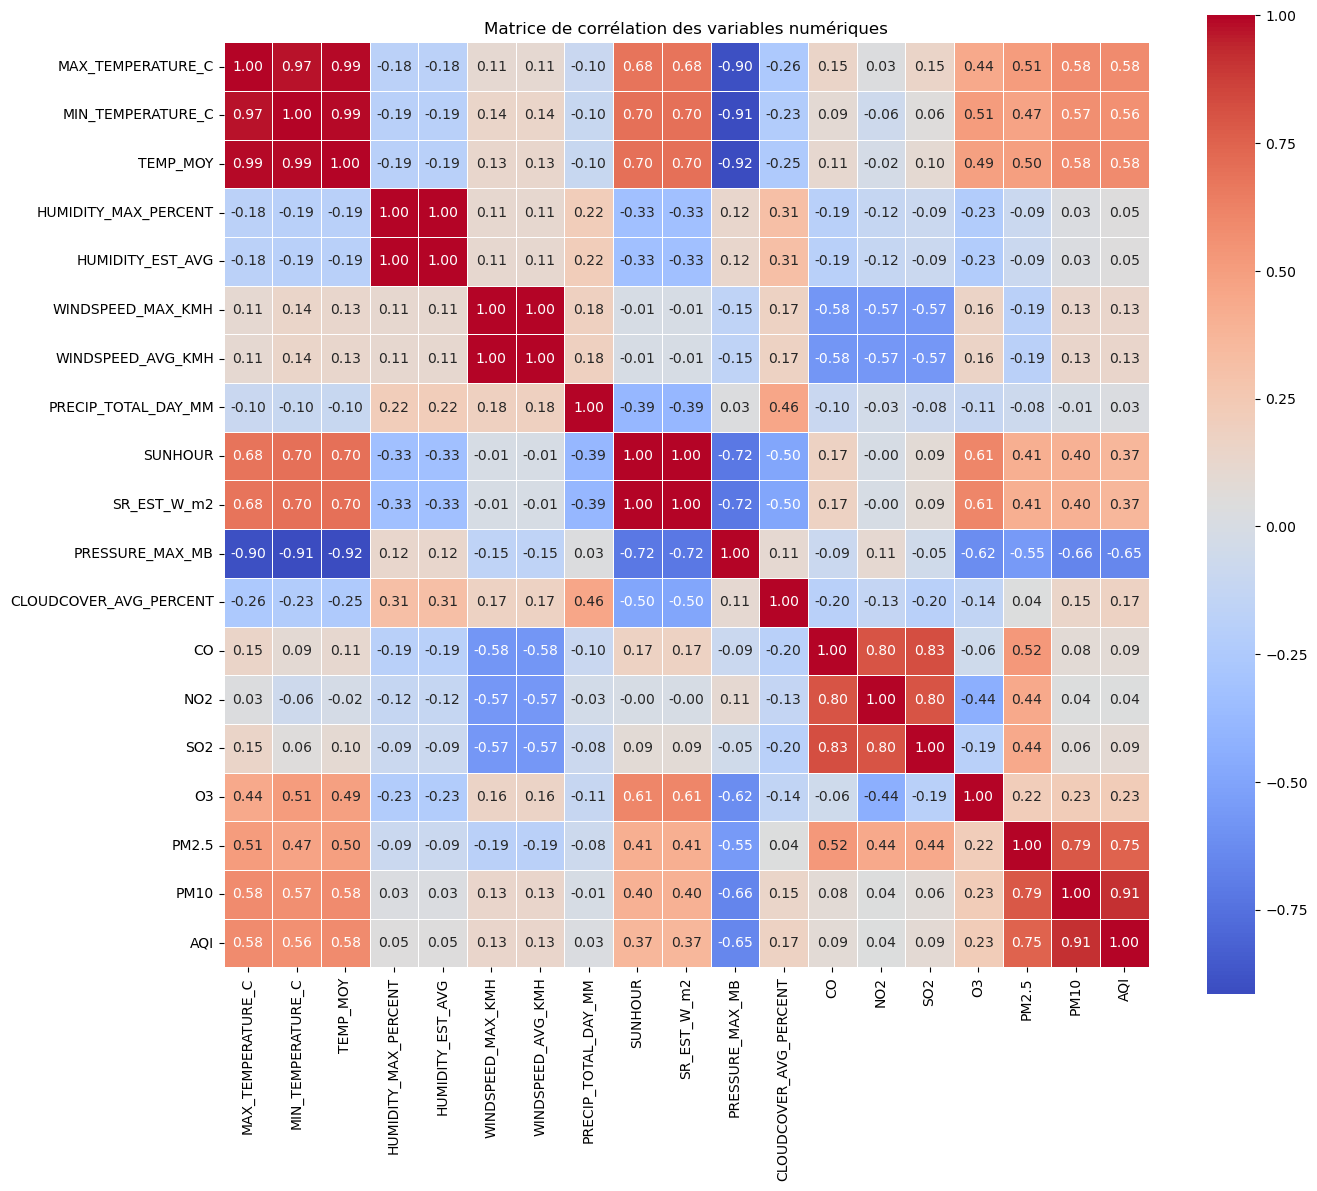

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Définir la taille de la figure
plt.figure(figsize=(14, 12))

# Créer une heatmap avec annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()


## Corrélations entre AQI et les autres variables

In [10]:
df['log_AQI'] = np.log(df['AQI'] + 1)  # +1 pour éviter log(0)
correlation_matrix = df.corr(numeric_only=True)

# Créer la colonne log_AQI si nécessaire
if 'log_AQI' not in df.columns:
    df['log_AQI'] = np.log(df['AQI'] + 1)

# Matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Corrélations avec log_AQI
corr_with_aqi = correlation_matrix[['log_AQI']].sort_values(by='log_AQI', ascending=False)

print(corr_with_aqi)

                         log_AQI
log_AQI                 1.000000
AQI                     0.982281
PM10                    0.895832
PM2.5                   0.783474
MAX_TEMPERATURE_C       0.601063
TEMP_MOY                0.599057
MIN_TEMPERATURE_C       0.579316
SUNHOUR                 0.384859
SR_EST_W_m2             0.384859
O3                      0.237639
CLOUDCOVER_AVG_PERCENT  0.164628
CO                      0.141650
SO2                     0.140435
NO2                     0.097733
WINDSPEED_AVG_KMH       0.087750
WINDSPEED_MAX_KMH       0.087750
HUMIDITY_EST_AVG        0.043023
HUMIDITY_MAX_PERCENT    0.043023
PRECIP_TOTAL_DAY_MM     0.036293
PRESSURE_MAX_MB        -0.666732


# ECONOMETRIE

In [ ]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

In [12]:
# Transformation de la variable cible (log AQI)
df['log_AQI'] = np.log(df['AQI'])

In [13]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT
# Sélection des variables explicatives
# ✅ Variables explicatives sélectionnées selon la littérature et la corrélation avec log_AQI
features = [
    'PM2.5',                    # Particules fines – très fortement liées à AQI
    'CO',                       # Monoxyde de carbone
    #'NO2',                      # Dioxyde d’azote
    'SO2',                      # Dioxyde de soufre
    #'Benzène',                  # Composé organique volatil (COV cancérogène)– modérément corrélé
    'O3',                       # Ozone – relation complexe mais important pour la chimie atmosphérique
    #'Toluène',                  # COV souvent utilisé en interaction

    # Variables météorologiques 
    'TEMP_MOY',                 # Température moyenne
    'WINDSPEED_AVG_KMH',         # Vitesse moyenne du vent
    'PRECIP_TOTAL_DAY_MM',     # Précipitations
    'CLOUDCOVER_AVG_PERCENT'   # Couverture nuageuse
]
X = df[features]
X = X.loc[:, ~X.columns.duplicated()]  # Supprimer les colonnes dupliquées
X = sm.add_constant(X)
y = df['log_AQI']

# Modèle OLS classique avec toutes les variables
model_ols = sm.OLS(y, X).fit()

# Afficher les résultats
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                log_AQI   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          5.73e-110
Time:                        00:15:29   Log-Likelihood:                 214.14
No. Observations:                 366   AIC:                            -410.3
Df Residuals:                     357   BIC:                            -375.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [14]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT

# Modèle robuste avec la norme de Huber
model_rlm = sm.RLM(y, X, M=HuberT()).fit()

# Afficher les résultats
print(model_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  366
Model:                            RLM   Df Residuals:                      357
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 12 Jul 2025                                         
Time:                        00:15:52                                         
No. Iterations:                    17                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

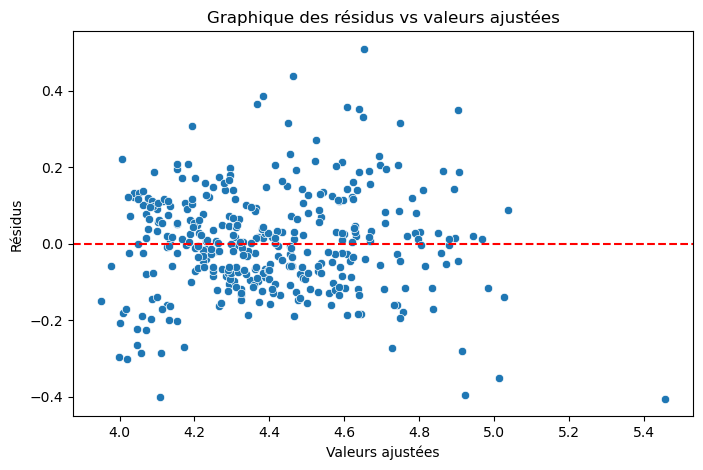

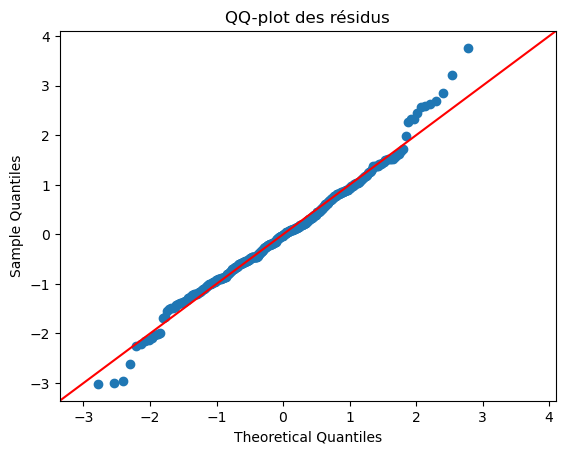

Statistique de Durbin-Watson : 1.274
📊 VIF - Facteurs d'inflation de la variance
                 Variable        VIF
0                   const  90.405308
2                      CO   3.920219
3                     SO2   3.628103
1                   PM2.5   2.202022
5                TEMP_MOY   1.981042
6       WINDSPEED_AVG_KMH   1.734387
8  CLOUDCOVER_AVG_PERCENT   1.606310
4                      O3   1.488002
7     PRECIP_TOTAL_DAY_MM   1.337487


{'Statistique de Durbin-Watson': np.float64(1.2742756678865987),
 'Nombre de résidus': 366,
 'Nombre de variables explicatives': 8}

In [15]:
# 1. ✅ Résidus
residuals = model_rlm.resid
fitted_values = model_rlm.fittedvalues

# 2. 📈 Graphique des résidus vs valeurs ajustées
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.title("Graphique des résidus vs valeurs ajustées")
plt.show()

# 3. 📉 QQ-Plot pour évaluer la distribution des résidus
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-plot des résidus")
plt.show()

# 4. 🧪 Test de Durbin-Watson (autocorrélation)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson : {dw_stat:.3f}")

# 5. 📊 VIF (multicolinéarité)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("📊 VIF - Facteurs d'inflation de la variance")
print(vif_data.sort_values(by="VIF", ascending=False))

# Résumé des vérifications
{
    "Statistique de Durbin-Watson": dw_stat,
    "Nombre de résidus": len(residuals),
    "Nombre de variables explicatives": X.shape[1] - 1  # moins la constante
}

C’est un test qui mesure l’autocorrélation des résidus (ou erreurs) d’un modèle de régression.

Elle varie entre 0 et 4 :

≈ 2 : pas d'autocorrélation → ✅ idéal

< 2 : autocorrélation positive (les erreurs se suivent)

> 2 : autocorrélation négative (les erreurs se compensent)

statistique DW = 1.581 indique une autocorrélation positive modérée des résidus.C’est acceptable dans un modèle RLM classique

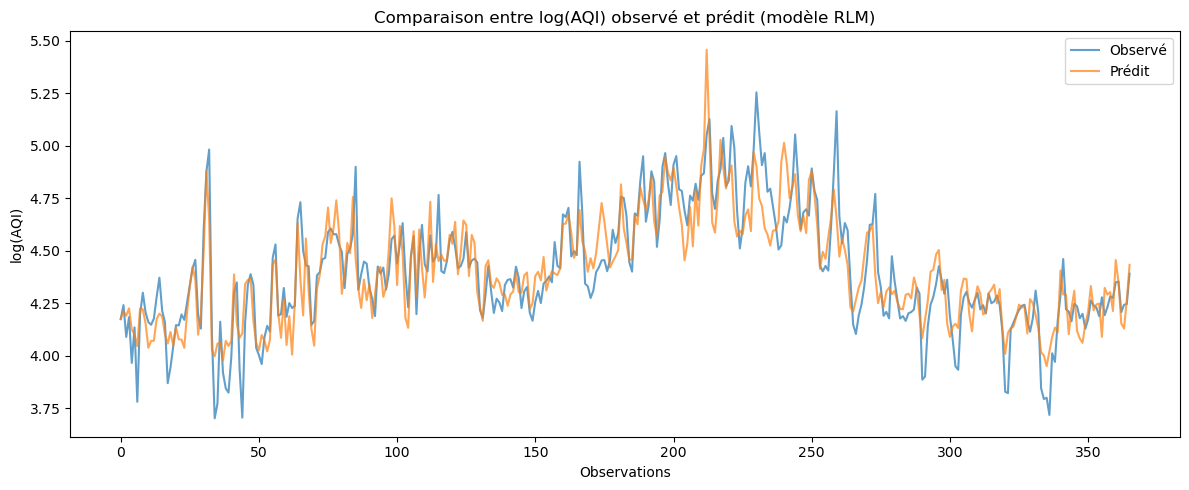

In [16]:
# Prédictions du modèle RLM
y_pred = model_rlm.fittedvalues
y_true = y

# Créer un DataFrame pour tracer les courbes
comparison_df = pd.DataFrame({
    'log_AQI_observé': y_true,
    'log_AQI_prédit': y_pred
})

# Tracer les courbes
plt.figure(figsize=(12, 5))
plt.plot(comparison_df['log_AQI_observé'].values, label='Observé', alpha=0.7)
plt.plot(comparison_df['log_AQI_prédit'].values, label='Prédit', alpha=0.7)
plt.title("Comparaison entre log(AQI) observé et prédit (modèle RLM)")
plt.xlabel("Observations")
plt.ylabel("log(AQI)")
plt.legend()
plt.tight_layout()
plt.show()
